# Metodos de orden superior para mayor precision.
Por falta de tiempo esta seccion no sera incluida en el programa.
Este tema esta en las notas de clase entre las paginas 148 y 171.
Solo mencionaremos algunos puntos importantes y pasaremos
a estudiar las ecuaciones de adveccion (advection equations).

## una lista de metodos para hallar estrellas con mejor orden de precision.

* uando polinomios de Taylor.
* Usando interpolacion de Lagrange
* Minimizacion del espectro.
* Filtro de suavizado en dominio de la frecuencia (numero de onda). Ventanas Gaussianas,
* Coeficientes indeterminados.

La grafica de abajo es de un operador de Laplace (onda) en 3D.


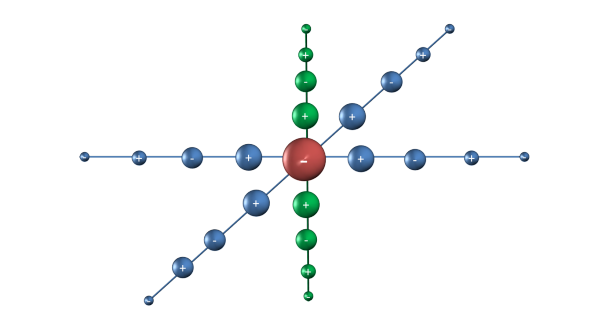

## Ecuaciones de adveccion:
La equacion de onda (1D) $u_{xx}-u_{tt}/c^2=0$ se puede factorizar en dos ecuaciones

$$\frac{\partial^2 u}{ \partial x^2} - \frac{1}{c^2(x)}
\frac{\partial^2 u}{\partial t^2} = 0 \Leftrightarrow
\left ( \frac{\partial}{\partial x} - \frac{1}{c(x)} \frac{\partial}{\partial t} \right )   \left ( \frac{\partial}{\partial x} + \frac{1}{c(x)} \frac{\partial}{\partial t}  \right ) u= 0$$

De aca salen dos ecuaciones

$$  \frac{\partial u}{\partial x} - \frac{1}{c(x)} \frac{\partial u}{\partial t}  = 0 $$
$$  \frac{\partial u}{\partial x} + \frac{1}{c(x)} \frac{\partial u}{\partial t}  = 0 $$
A estas ecuaciones se les llama de **adveccion**.


Vamos a asumir que $c=c(x)$ es constante. $x \in [a,b] \in \mathbb{R}, a \ne b$. Cualquier funcion del tipo
$$u(x,t)=f(x - ct) $$
satisface la segunda ecuacion, pues
$$u_x= f'(x-ct)  \quad , u_t=-f'(x-ct) c $$
de forma que
$$ u_x + u_t/c=0$$.
Esto representa una onda viajando hacia la derecha. La condicion inicial $u(x,t_0)=p(x)=f(x-c t_0)$, determina la forma del pulso.
Las condiciones de frontera deben ser consistentes con este pulso de forma que

* En $x=a$
$$u(a,t) = f(a - ct) = f(a + c t_0 - c t_0 - ct) = f(a + c(t_0 -t) - c t_0)  =  p(a + c(t_0-t)) $$
* En $x=b$
$$u(b,t) = f(b - ct) = f(b + c t_0 - c t_0 - ct) = f(b + c(t_0 -t) - c t_0)  =  p(b + c(t_0-t)) $$



Tomemos ahora la function $u(x,t)=f(x+ct)$ de forma que
$$u_x = f'(x + ct)  \quad , \quad u_t = f'(x+ct) c $$
$u(x,t)=f(x + ct)$. La condicion inicial es
$u(x,t_0)=f(x + ct_0)=p(x)$  determina el **pulso**.
Es decir
$$u(a,t) = f(a + ct) = f(a - c t_0 + c t_0 + ct) = f(a - c(t_0 -t) + c t_0)  =  p(a - c(t_0-t)) $$
* En $x=b$
$$u(b,t) = f(b + ct) = f(b - c t_0 + c t_0 + ct) = f(b - c(t_0 -t) + c t_0)  =  p(b - c(t_0-t)) $$


Vamos a tratar varios algoritmos para la implementacion de la ecuacion de advaccion $u_t = - c u_{xx}$

1. Progresiva en tiempo y central en espacio:



$$\frac{w_{i j+1} - w_{i j}}{\Delta t} = -c  \frac{w_{i+1,j} - w_{i-1, j}}{2 \Delta x} $$
con $\gamma= c \Delta t/\Delta x$ (numero CFL) esto queda

$$w_{i, j+1} = -\frac12 \gamma ( w_{i+1, j} - w_{i-1, j}) + w_{ij} \tag{1} $$

Hagamos analisis de estabilidad de Neumann
Asumimos que
$$ w_{ij} =\mathrm{e}^{\mathrm{i} \omega t_j} \mathrm{e}^{\mathrm{i} k x_i} $$
Reemplazamos esto en la ecuacion (1) y dividimos por $w_{ij}$

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = -\frac12 \gamma
\left (  \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}  \right ) + 1 = -\gamma \mathrm{i} \sin k \Delta x + 1$$
De forma que

$$ G= | \mathrm{e}^{\mathrm{i} \omega \Delta t}| = \sqrt{1 +
\gamma^2  \sin^2 k \Delta x } \ge 1$$
El sistema es inestable.

2. Progresiva en ambos (tiempo y espacio)

$$\frac{w_{i ,j+1} - w_{ij}}{\Delta t} = -c \frac{w_{i+1, j} - w_{ij}}{\Delta x} \tag{2} $$

El esquema queda (despejando el tiempo $j+1$)
$$w_{i, j+1} = -\gamma( w_{i+1, j} - w_{ij}) + w_{ij} $$
Volvamos al analisis de John von Neumann

$$ w_{ij} =\mathrm{e}^{\mathrm{i} \omega t_j} \mathrm{e}^{\mathrm{i} k x_i} $$
Insertando esto en la ecuacion (2) y divididiendo por $w_{ij}$
encontramos

Recordemos
$$\mathrm{e}^{\mathrm{i} \theta} = \cos \theta + \mathrm{i} \sin \theta $$

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = -\gamma \mathrm{e}^{\mathrm{i} k \Delta x} + (1 + \gamma) = -\gamma \cos k \Delta x + 1 + \gamma - \gamma \mathrm{i} \sin k \Delta x  $$

De nuevo

$$ G= | \mathrm{e}^{\mathrm{i} \omega \Delta t}| =
\sqrt{(1 + \gamma - \gamma \cos k \Delta)^2 + \gamma^2 \sin^2 k \Delta x} \ge 1$$


Tambien es inestable.

3.  Por ultimos ensayamos el metodo de Crank-Nicholson

$$w_{i, j+1} = -\frac{\gamma}{4} ( w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 , j} - w_{i-1, j}) + w_{ij} \tag{3}$$

Probemos la estabilidad usando John Von Neumann



\begin{eqnarray}
\mathrm{e}^{\mathrm{i} \omega \Delta t} &=& -\frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} ( \omega \Delta t + k \Delta x)} - \mathrm{e}^{\mathrm{i}(\omega \Delta t - k \Delta x)} + \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}) + 1   \\
&=&-\frac{\gamma}{4} ( 2 \mathrm{i} \mathrm{e}^{\omega \Delta t} \sin k \Delta x + 2 \mathrm{i} \sin k \Delta x) + 1 \\
\mathrm{e}^{\mathrm{i} \omega \Delta t} \left (1 + \frac{\gamma}{2} \mathrm{i} \sin k \Delta x  \right )&=&
1 - \frac{\gamma}{2} \mathrm{i} \sin k \Delta x
\end{eqnarray}
Despejando $\mathrm{e}^{\mathrm{i} \omega \Delta t}$
encontramos

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = \frac{1 - \mathrm{i} \frac{\gamma}{2} \sin k \Delta x}{1 + \mathrm{i} \frac{\gamma}{2} \sin k \Delta x} $$

De la ecuacion (3) movemos los terminos con $j+1$ todos a la izquierda.

$$-\frac{\gamma}{4} w_{i-1, j+1} + w_{i , j+1} + \frac{\gamma}{4} w_{i+1 , j+1} = \frac{\gamma}{4} w_{i-1, j} + w_{ij} - \frac{\gamma}{4} w_{i+1, j}  \tag{4} $$


Para el caso de $j=0$, $w_{i0}=p_i$ (condicion inicial)
$w_{0j}=e_j$, $w_{nx-1 j}= f_j$
En la ecuacion (4) tomemos $i=1$


$$-\frac{\gamma}{4} w_{0, j+1} + w_{1 , j+1} + \frac{\gamma}{4} w_{2 , j+1} = \frac{\gamma}{4} w_{0, j} + w_{1j} - \frac{\gamma}{4} w_{2, j} $$
Reorganizando

$$w_{1 j+1} + \frac{\gamma}{4} w_{2 j+1} =w_{1j} - \frac{\gamma}{4} w_{2j} + \frac{\gamma}{4} w_{0 j+1} + \frac{\gamma}{4} w_{0j} $$

En el otro extremo para $i=n-2$


$$-\frac{\gamma}{4} w_{n-3, j+1} + w_{n-2 , j+1} + \frac{\gamma}{4} w_{n-1 , j+1} = \frac{\gamma}{4} w_{n-3, j} + w_{n-2,j} - \frac{\gamma}{4} w_{n-1, j}  $$

El sistema queda de forma matricial


$$A w_{j+1} = B w_j + b $$
donde

$$A = \begin{pmatrix}
1 & \frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
-\frac{\gamma}{4} & 1 & \frac{\gamma}{4} &  0 & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0  \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots  \\
0 &  0  & \cdots & -\frac{\gamma}{4}  & 1 & \frac{\gamma}{4}  \\
0 &  0  & \cdots & \cdots   & -\frac{\gamma}{4} & 1   \\
\end{pmatrix} $$


$$B = \begin{pmatrix}
1 & -\frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
\frac{\gamma}{4} & 1 & -\frac{\gamma}{4} &  0 & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0  \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots  \\
0 &  0  & \cdots & \frac{\gamma}{4}  & 1 & -\frac{\gamma}{4}  \\
0 &  0  & \cdots & \cdots   & \frac{\gamma}{4} & 1   \\
\end{pmatrix} $$

$$w_j=\begin{pmatrix} w_{1j} \\ w_{2j} \\ \vdots \\ \vdots \\ \vdots  \\ w_{n-2 , j} \end{pmatrix} $$

$$ b= \begin{pmatrix} \frac{\gamma}{4} w_{0, j+1} + \frac{\gamma}{4} w_{0j}  \\
0 \\
\vdots \\
0
-\frac{\gamma}{4} w_{n-1, j+1} - \frac{\gamma}{4} w_{n-1, j} \end{pmatrix} $$



Recuerden $u_x + \frac{1}{c} u_{t}$
$$u(x,t_0) = p(x) $$
$$p(x)=\mathrm{e}^{-400(x - 0.5)^2} $$
$$g(x,t)=0$

$$x \in [0, L], L=1, c=1, t_0=0, a=0, b=1 $$
$$e(t) = u(0,t) = p(a - c(t-t_0) $$
$$f(t) = u(1,t) = p(b - c(t-t_0) $$



In [8]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.pyplot import figure
figure(figsize=(16,10))

# implmentacion del algoritmo
def solve_advec(c, t0, a, b, nt, nx, dt, p, cb):
    L=float(b-a)
    dx=L/(nx-1)
    gamma=c*dt/dx

    tmax=nt*dt

    # inicialize w vector
    w=np.zeros((nx,nt))
    X = np.linspace(a, b, nx)

    # print dimensions of w
    print("dimensions of w", w.shape)

    # condiciones de frontera

    for j in range(nt):
        w[0,j]=p(a-c*(j*dt-t0))
        w[nx-1,j]=p(b-c*(j*dt-t0))

    # inicializacion del vector de la deracha (rhs)
    rhs = np.zeros(nx-2)

    # matrix A, B, b, inicializacion
    A = np.zeros((nx-2,nx-2))
    B = np.zeros((nx-2,nx-2))
    b = np.zeros(nx-2)

    # condicion inicial
    w[:,0]=np.asarray([p(xx) for xx in X])

    # llenamos las matrices A,B
    for i in range(nx-2):
        A[i,i]=1
        B[i,i]=1
        if i>0:
            A[i,i-1]=-gamma/4
            B[i,i-1]=gamma/4
        if i<nx-3:
            A[i,i+1]=gamma/4
            B[i,i+1]=-gamma/4

    b[0] = gamma/4*(w[0,1]+w[0,0])
    b[nx-3] = -(gamma/4)*(w[nx-1,1]+w[nx-1,0])

    # vector del lado derecho
    rhs = B.dot(w[1:-1,0]) + b

    # ciclo sobre tiempos
    for j in range(0,nt-1):

        # resuelva A w_{j+1}=w_j
        x = np.linalg.solve(A, rhs)
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1,j+1]=x[i]

        b[0] = gamma/4*(w[0,j+1]+w[0,j])
        b[nx-3] = -(gamma/4)*(w[nx-1,j]+w[nx-1,j+1])

    return w






<Figure size 1600x1000 with 0 Axes>

In [9]:
# prueba numerica
v = 1.0

# condiciones de borno iniciales en 0
def e(x):
    return 0

def p(x):
    return np.exp(-400*(x-0.5)**2)


def q(x):
    return 0

# datos (parametros)
dt=0.001
nt=1001
nx=501
a=0
b=1
t0=0
cb=0 # condiciones de borde, pero no las uso

w = solve_advec(v, t0, a, b, nt, nx, dt, p, cb)


dimensions of w (501, 1001)


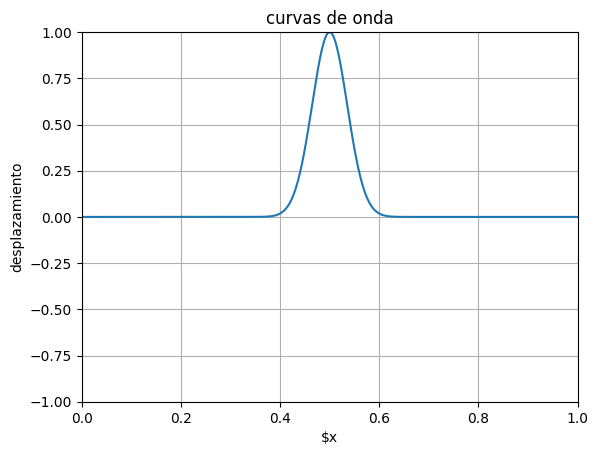

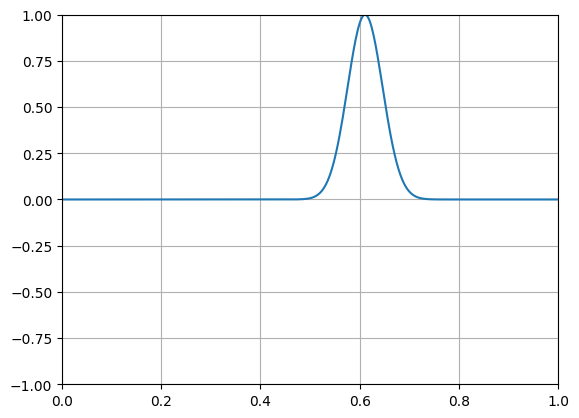

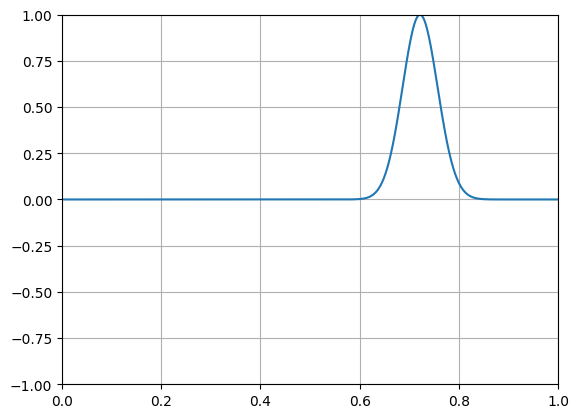

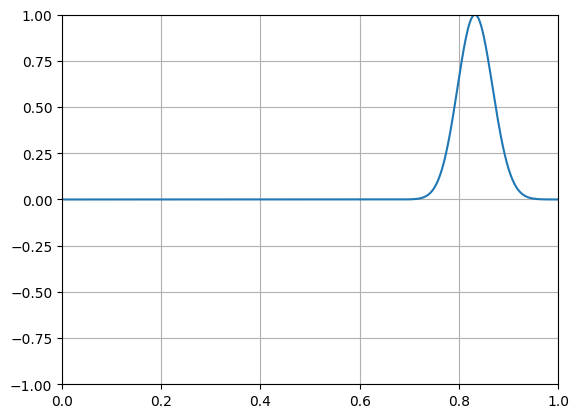

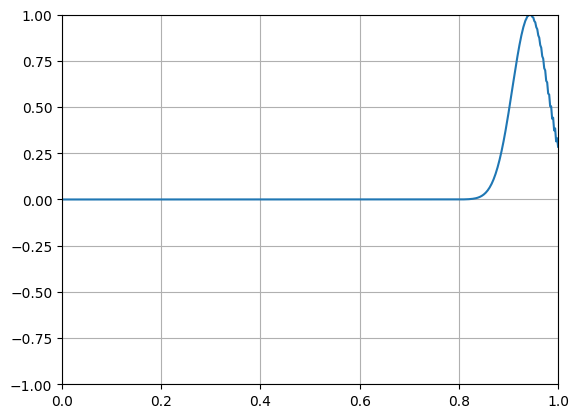

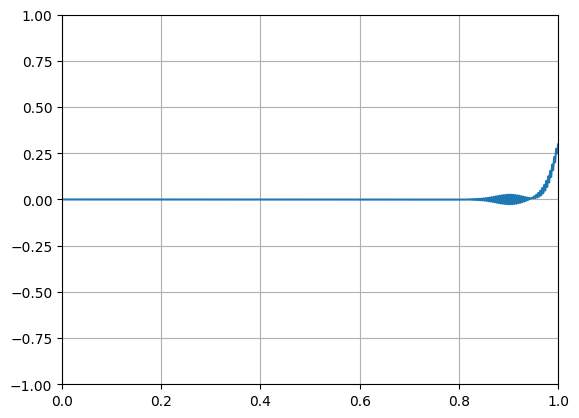

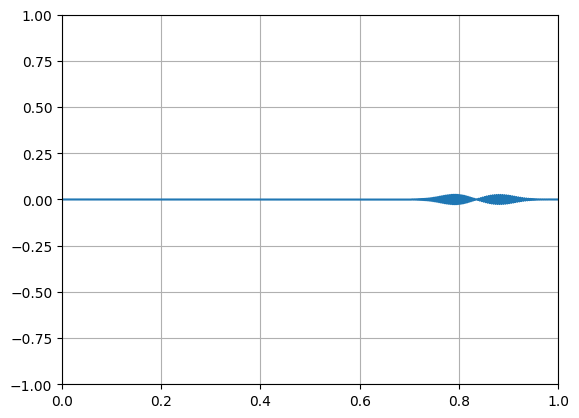

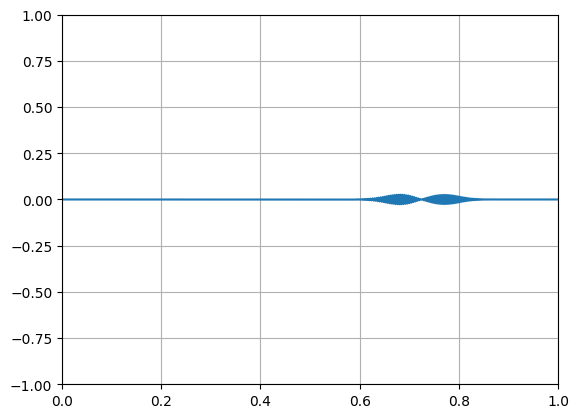

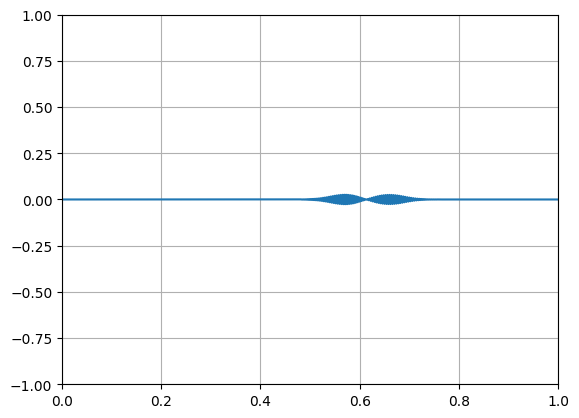

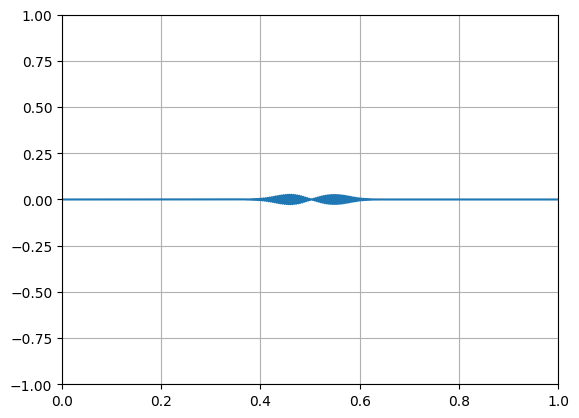

In [10]:
# grafica
params={'legend.fontsize':5, 'legend.handlength':1}

Ndt=111
plt.xlabel(r'$x')
plt.ylabel(r'desplazamiento')
plt.title(r"curvas de onda")

X = np.linspace(a,b,w.shape[0])

for j in range(0, nt, Ndt):
    t=j*dt

    plt.plot(X, w[:,j], label=str(round(t,1)) + "  seg")
    plt.axis([0,1.0, -1, 1])


    plt.grid(True)
    plt.show()



# Animacion


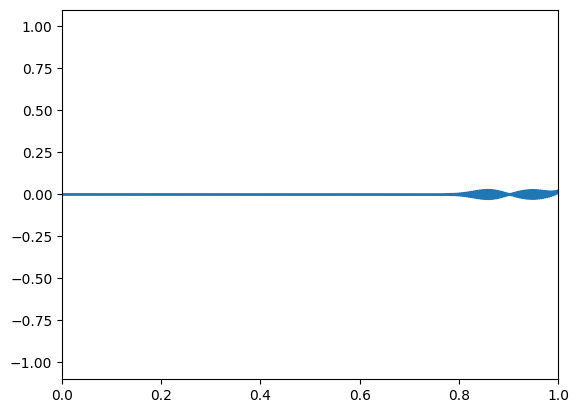

In [ ]:
from matplotlib.animation import FuncAnimation

X = np.linspace(a,b,w.shape[0])
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# set limits
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

 # update function
def update(j):
    line.set_data(X, w[:,j])
    return line,

# create animation
j_max = 600
ani = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True, interval=20)
ani.save('wave.gif', writer='pillow')

plt.show()

